# 4.1 Определение энергии $\alpha$-частиц по величине их пробега в воздухе 

Импротируем необходимые библиотеки.

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit

In [2]:
def line(x, k, c):
    return k * x + c

## Счетчик Гейгера

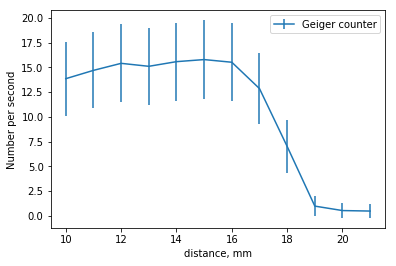

In [12]:
data = pd.read_csv('geiger.csv', sep = ',', encoding = 'latin1')
x = data.distance
y = data.counts
plt.errorbar(x, y,yerr=y**0.5, label = 'Geiger counter')


plt.ylabel('Number per second')
plt.xlabel('distance, mm')
plt.legend()

energy = 4.07 MeV


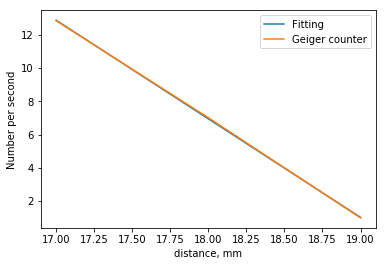

In [13]:
x1 = x[7:10]
y1 = y[7:10]
res = curve_fit(f = line, xdata = x1, ydata = y1)
popt, pcov = res
plt.plot(x1, line(x1, *popt), label = 'Fitting')
plt.plot(x1, y1, label = 'Geiger counter')

plt.ylabel('Number per second')
plt.xlabel('distance, mm')
plt.legend()

print('energy = {:.3} MeV'.format(-popt[1] / popt[0] / 10 /0.32 ** 0.66))

## Сцинтиляционные счетчик

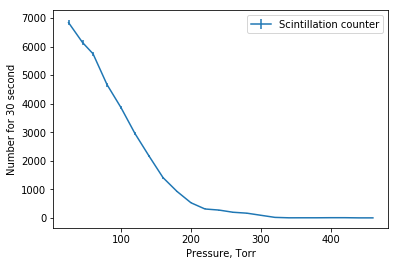

In [20]:
data = pd.read_csv('scintillation.csv', sep = ',', encoding = 'latin1')
x = data.pressure
y = data.counter
plt.errorbar(x, y, yerr=y**0.5, label = 'Scintillation counter')
plt.ylabel('Number for 30 second')
plt.xlabel('Pressure, Torr')
plt.legend();

energy =  4.758767109179937 MeV


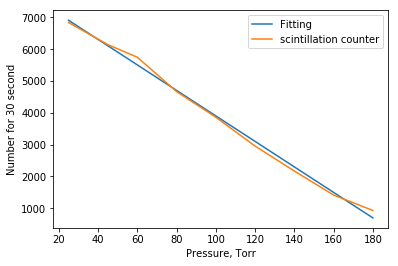

In [15]:
x1 = x[0:9]
y1 = y[0:9]
res = curve_fit(f = line, xdata = x1, ydata = y1)
popt, pcov = res
plt.plot(x1, line(x1, *popt), label = 'Fitting')
plt.plot(x1, y1, label = 'scintillation counter')

plt.ylabel('Number for 30 second')
plt.xlabel('Pressure, Torr')
plt.legend()

print('energy = ', (-popt[1] / popt[0] * 288 / 300 / 760) * 9 / 0.32 ** 0.66 , 'MeV')

## Ионизационная камера

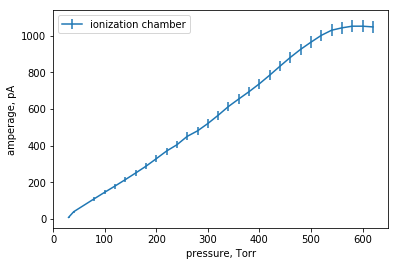

In [18]:
data = pd.read_csv('ionization.csv', sep = ',', encoding = 'latin1')
x = data.pressure
y = data.ionization

plt.errorbar(x, y,yerr=y**0.5, label = 'ionization chamber')
plt.ylabel('amperage, pA')
plt.xlabel('pressure, Torr')
plt.legend(loc=0);

energy =  7.53166201034127 MeV


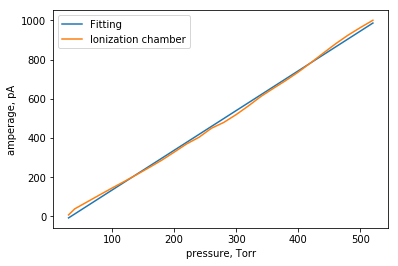

In [17]:
x1 = x[0:25]
y1 = y[0:25]
res = curve_fit(f = line, xdata = x1, ydata = y1)
popt, pcov = res

plt.plot(x1, line(x1, *popt), label='Fitting',)
plt.plot(x1, y1, label="Ionization chamber")

plt.ylabel('amperage, pA')
plt.xlabel('pressure, Torr')
plt.legend()

print('energy = ', ((((1050 - popt[1]) / popt[0] * 288 / 300 / 760 * 9.5) / 0.32) ** (2/3)) , 'MeV')